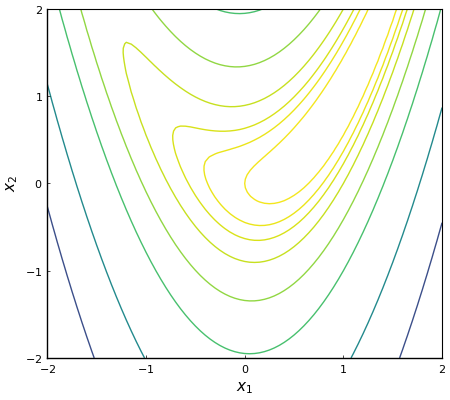

In [2]:
using Convex, SCS

# Define function, gradient and hessian
f = x -> (1-x[1])^2 + 5*(x[2] - x[1]^2)^2
∇f = x -> [2*(10*x[1]^3-10*x[1]*x[2]+x[1]-1), 10*(x[2]-x[1]^2)]
H = x -> [-20*(x[2] - x[1]^2) + 40*x[1]^2+2    -20*x[1]; 
          -20*x[1]                                  10] 

##################################################################################
# Define algorithm to solve the local problem
function solve_trust_region_subproblem(f, ∇f, H, x0, δ)
    x = Variable(length(x0))
    p = minimize(f(x0) + ∇f(x0)'*(x-x0) + quadform(x-x0, H(x0))/2)
    p.constraints += norm(x-x0) <= δ
    solve!(p, () -> SCS.Optimizer(verbose=false))
    return (x.value, p.optval)
end

###################################################################################
using Plots, LaTeXStrings, Printf
pyplot(size=(450, 400))

# add PGFPlotsX (Textlive, MikTeX)

# Rosenbrock function
fp(x1,x2) = (1 - x1)^2 + 5*(x2 - x1^2)^2

x1 = -2:0.05:2
x2 = -2:0.05:2

pl1 = contour(x1, x2, fp, framestyle = :box,
    levels = [1,2,3,5,10,20,50,100], 
    c = cgrad(:viridis, rev = true, scale = :exp),
    ylab = L"x_2", 
    xlab = L"x_1",
    xlims = (-2,2),
    ylims = (-2,2),
    legend = false,
    grid = false,
    label = false)

In [4]:
η1=0.25
η2=0.5
γ1=0.5
γ2=2.0
δ=0.5 # Radio

0.5

In [5]:
# Iteration = 1
x = [-1.75,-1.75]
y = f(x)
@time x′, y′ = solve_trust_region_subproblem(f, ∇f, H, x, δ)

 27.285868 seconds (78.32 M allocations: 3.791 GiB, 5.66% gc time)


([-1.2948787632046916; -1.5429621774996942], 60.611778195855244)

In [6]:
η = (y - f(x′)) / (y - y′)

1.0559959884700407

In [7]:
if η < η1
    δ *= γ1
else
    x, y = x′, y′
    if η > η2
        δ *= γ2
    end
end
x, δ

([-1.2948787632046916; -1.5429621774996942], 1.0)

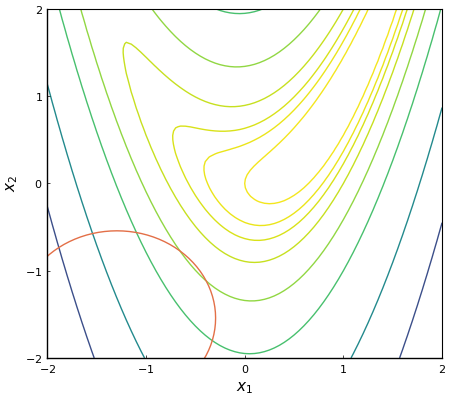

In [8]:
θs = range(0,stop=2π,length=101)
cx1 = x[1] .+ δ*cos.(θs)
cx2 = x[2] .+ δ*sin.(θs)
i = 1

msg = @sprintf("Iter = %i", i)
plot!(cx1, cx2, label = msg)

-0.00022444204907773118
[0.999999231883497; 0.999996893243949]0.0009765625


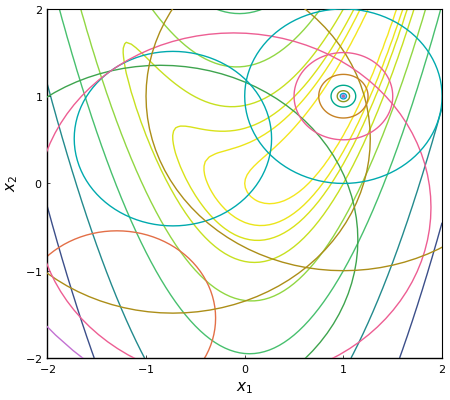

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [41]:
# Iteration = 2
y = f(x)
x′, y′ = solve_trust_region_subproblem(f, ∇f, H, x, δ)

η = (y - f(x′)) / (y - y′)
println(η)

if η < η1
    δ *= γ1
else
    x, y = x′, y′
    if η > η2
        δ *= γ2
    end
end

println(x, δ)

θs = range(0,stop=2π,length=101)
cx1 = x[1] .+ δ*cos.(θs)
cx2 = x[2] .+ δ*sin.(θs)

i += 1
msg = @sprintf("Iter = %i", i)
plot!(cx1, cx2, label = msg)

In [42]:
x, f(x)

([0.999999231883497; 0.999996893243949], 1.2922725403064212e-11)